In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 

In [26]:
file_path = (r"C:\Users\gokul\Downloads\newhousing.csv")
raw_df = pd.read_csv(file_path, sep=',', header=0,  dtype='unicode')
raw_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi_furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820,0.5
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520,0.5
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250,0.5


In [27]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    object
 1   area             545 non-null    object
 2   bedrooms         545 non-null    object
 3   bathrooms        545 non-null    object
 4   stories          545 non-null    object
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   basement         545 non-null    object
 8   hotwaterheating  545 non-null    object
 9   airconditioning  545 non-null    object
 10  parking          545 non-null    object
 11  prefarea         545 non-null    object
 12  semi_furnished   545 non-null    object
 13  unfurnished      545 non-null    object
 14  areaperbedroom   545 non-null    object
 15  bbratio          545 non-null    object
dtypes: object(16)
memory usage: 68.3+ KB


In [28]:
raw_df['bedrooms'] = pd.to_numeric(raw_df['bedrooms'], errors='coerce')
raw_df['bathrooms'] = pd.to_numeric(raw_df['bathrooms'], errors='coerce')
raw_df['price'] = pd.to_numeric(raw_df['price'], errors='coerce')
raw_df['area'] = pd.to_numeric(raw_df['area'], errors='coerce')
raw_df['stories'] = pd.to_numeric(raw_df['stories'], errors='coerce')
raw_df['mainroad'] = pd.to_numeric(raw_df['mainroad'], errors='coerce')
raw_df['guestroom'] = pd.to_numeric(raw_df['guestroom'], errors='coerce')
raw_df['basement'] = pd.to_numeric(raw_df['basement'], errors='coerce')
raw_df['hotwaterheating'] = pd.to_numeric(raw_df['hotwaterheating'], errors='coerce')
raw_df['airconditioning'] = pd.to_numeric(raw_df['airconditioning'], errors='coerce')
raw_df['parking'] = pd.to_numeric(raw_df['parking'], errors='coerce')
raw_df['prefarea'] = pd.to_numeric(raw_df['prefarea'], errors='coerce')
raw_df['semi_furnished'] = pd.to_numeric(raw_df['semi_furnished'], errors='coerce')
raw_df['areaperbedroom'] = pd.to_numeric(raw_df['areaperbedroom'], errors='coerce')
raw_df['bbratio'] = pd.to_numeric(raw_df['bbratio'], errors='coerce')
raw_df['unfurnished'] = pd.to_numeric(raw_df['unfurnished'], errors='coerce')

In [29]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi_furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.3 KB


In [30]:
raw_df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi_furnished,unfurnished,areaperbedroom,bbratio
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,1819.852599,0.446361
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,839.091825,0.159492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,0.166667
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1237.500000,0.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2183.333333,0.500000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6600.000000,1.000000


Bin 1: 12
Bin 2: 20
Bin 3: 29
Bin 4: 46
Bin 5: 68
Bin 6: 49
Bin 7: 58
Bin 8: 44
Bin 9: 37
Bin 10: 31
Bin 11: 34
Bin 12: 24
Bin 13: 21
Bin 14: 11
Bin 15: 14
Bin 16: 7
Bin 17: 7
Bin 18: 11
Bin 19: 5
Bin 20: 5
Bin 21: 3
Bin 22: 3
Bin 23: 0
Bin 24: 1
Bin 25: 0
Bin 26: 1
Bin 27: 0
Bin 28: 3
Bin 29: 0
Bin 30: 1


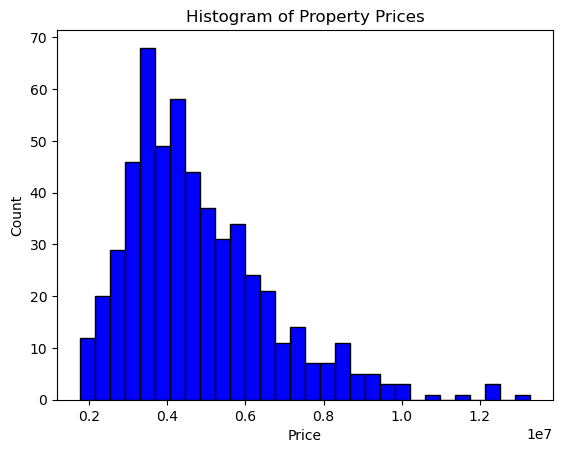

In [31]:
hist, bins = np.histogram(raw_df['price'], bins=30)

# Printing histogram values
for i, value in enumerate(hist):
    print(f"Bin {i+1}: {value}")

plt.hist(raw_df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Bin 1: 5
Bin 2: 24
Bin 3: 42
Bin 4: 59
Bin 5: 62
Bin 6: 64
Bin 7: 59
Bin 8: 65
Bin 9: 43
Bin 10: 34
Bin 11: 17
Bin 12: 18
Bin 13: 15
Bin 14: 7
Bin 15: 9
Bin 16: 3
Bin 17: 4
Bin 18: 3
Bin 19: 3
Bin 20: 2
Bin 21: 1
Bin 22: 0
Bin 23: 1
Bin 24: 3
Bin 25: 0
Bin 26: 1
Bin 27: 0
Bin 28: 0
Bin 29: 0
Bin 30: 1


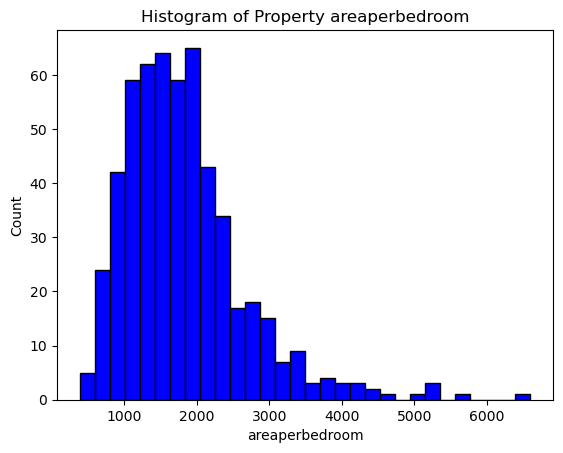

In [32]:
hist, bins = np.histogram(raw_df['areaperbedroom'], bins=30)

# Printing histogram values
for i, value in enumerate(hist):
    print(f"Bin {i+1}: {value}")
plt.hist(raw_df['areaperbedroom'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Property areaperbedroom')
plt.xlabel('areaperbedroom')
plt.ylabel('Count')
plt.show()

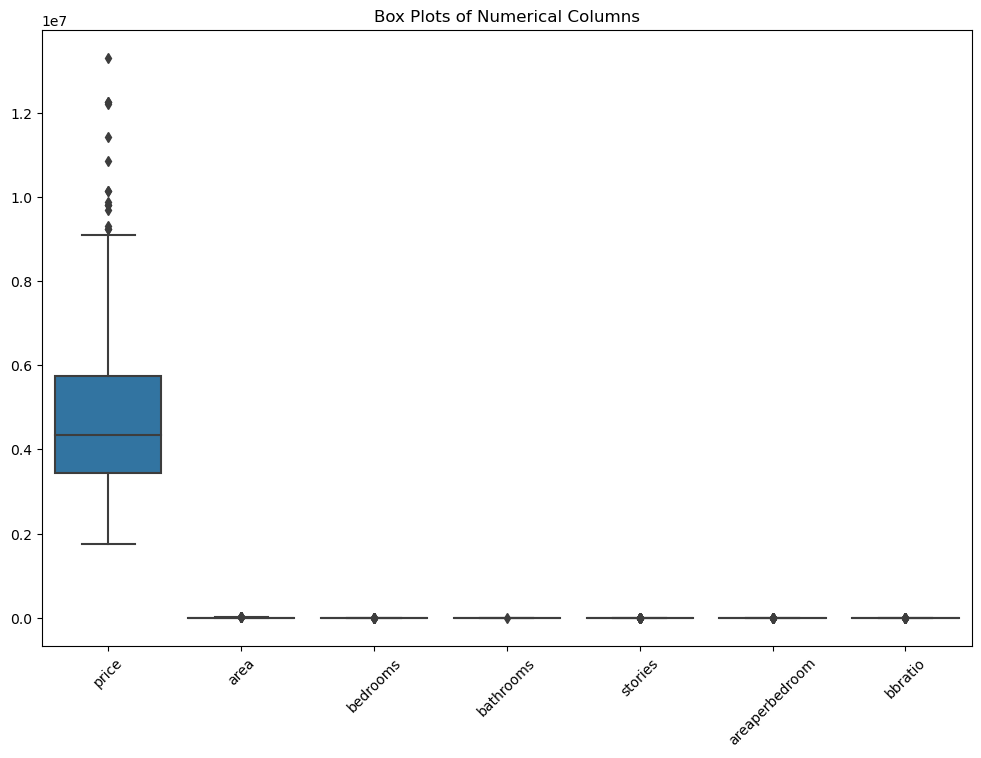

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'areaperbedroom', 'bbratio']

# Create a box plot for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=raw_df[numerical_columns])
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

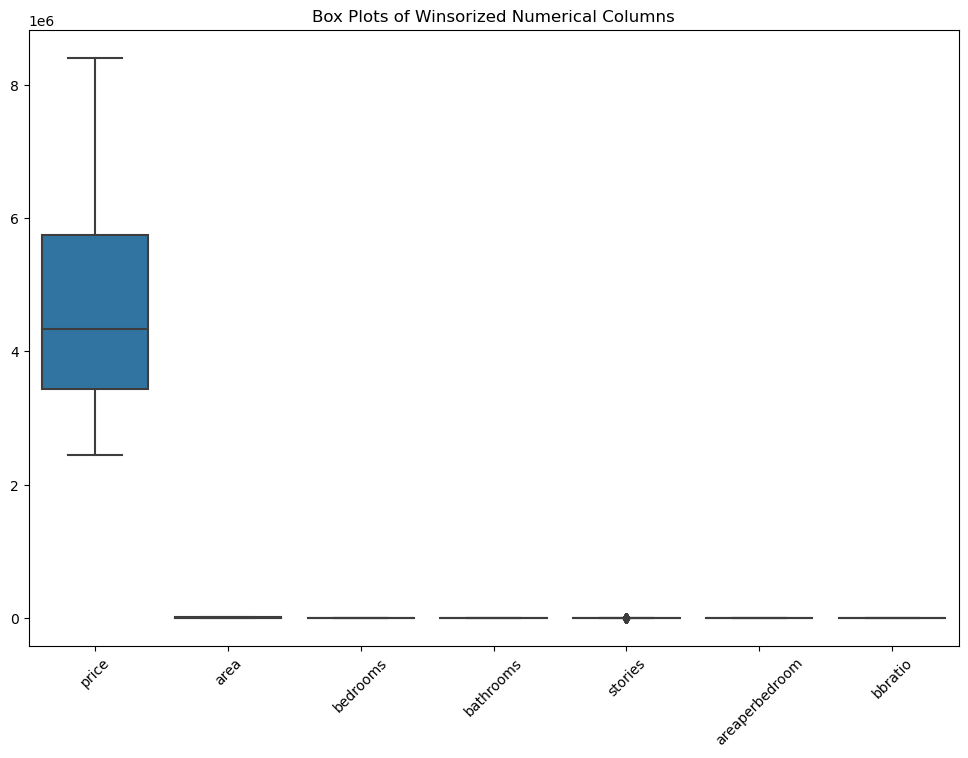

In [34]:
from scipy.stats.mstats import winsorize

numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'areaperbedroom', 'bbratio']

# Winsorize the numerical columns
for column in numerical_columns:
    raw_df[column] = winsorize(raw_df[column], limits=[0.05, 0.05])

# Box plot for each winsorized numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=raw_df[numerical_columns])
plt.title('Box Plots of Winsorized Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [35]:
X2 = raw_df.drop(["areaperbedroom"], axis=1)
y2 = raw_df["areaperbedroom"]
X = raw_df.drop(["price"], axis=1)
y = raw_df["price"]

[[ 0.2364703   0.08514299  1.6687487  ... -0.6964292   0.07153001
   1.72806162]
 [-0.55707963  0.08514299 -0.5992514  ... -0.6964292  -0.62649275
  -0.7810461 ]
 [-0.77449057 -1.41172569 -0.5992514  ...  1.43589615  0.0524061
   0.47350776]
 ...
 [ 1.73117052  0.08514299 -0.5992514  ... -0.6964292   1.38629891
  -0.7810461 ]
 [ 2.13881604 -1.41172569 -0.5992514  ... -0.6964292   2.28273225
   0.47350776]
 [-0.5962136   0.08514299 -0.5992514  ... -0.6964292  -0.66091579
  -0.7810461 ]]


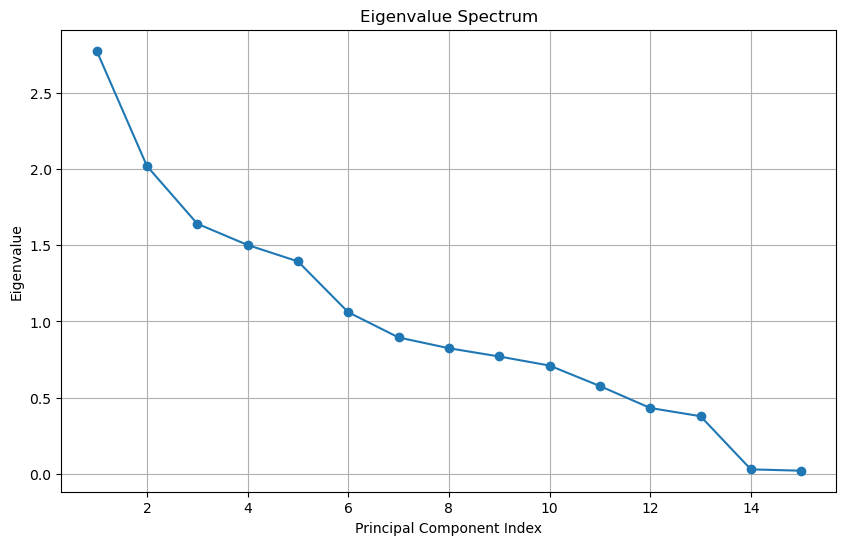

In [36]:
from sklearn.decomposition import PCA
# Standardize the data
from sklearn.preprocessing import StandardScaler
data_standardized = StandardScaler().fit_transform(X)
print(data_standardized)

# Calculate the covariance matrix
cov_matrix = np.cov(data_standardized, rowvar=False)

# Calculate the eigenvalues
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
eigenvalues = np.sort(eigenvalues)[::-1]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Eigenvalue Spectrum')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

# Print corresponding eigenvectors
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.77496095 2.01850419 0.03002801 0.02111339 1.64058556 1.5011725
 1.39362145 1.06025493 0.37859476 0.43241938 0.57637794 0.89493324
 0.71061992 0.77014397 0.82424333]

Eigenvectors:
[[ 4.65027396e-01 -2.35355723e-01 -5.72548954e-01  2.98895112e-01
   6.72754555e-02  1.76525858e-01  1.74238191e-01  9.07748786e-02
   2.02695162e-02  4.14815246e-02  2.05278314e-01  1.75123411e-01
   2.75462288e-01 -2.90362801e-01 -4.23228922e-02]
 [ 1.60430070e-01  5.41287173e-01  4.76045142e-01  2.48661386e-01
   1.06647060e-01  2.73172190e-01  4.35752435e-02  1.65484897e-01
   6.41729195e-03  3.20890617e-01  2.11881901e-01  1.12960143e-01
   2.85058355e-01 -8.57203134e-02  1.68125225e-01]
 [ 3.46151395e-01  2.90151949e-01 -2.10481748e-01 -6.14334467e-01
  -4.18669780e-01 -2.71399224e-01 -1.17243091e-01  3.79765243e-02
   1.95775780e-02  1.90997935e-01  1.05530447e-01 -1.98861570e-02
   1.41894681e-01 -2.23214126e-02  2.02789545e-01]
 [ 1.93286742e-01  4.15873944e-01  2.00992640e-02 -1.5880

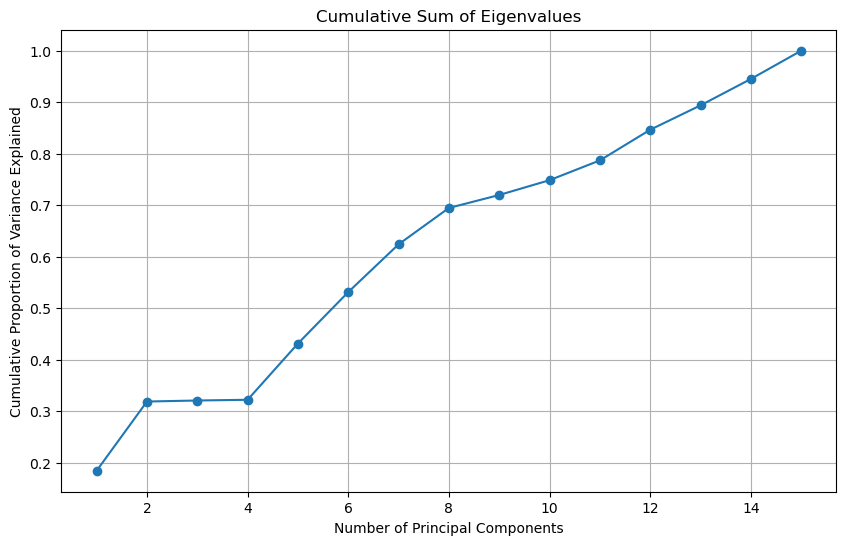

In [38]:
# Calculate the cumulative sum of eigenvalues
cumulative_sum = np.cumsum(eigenvalues)

# Create a plot of the cumulative sum of eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_sum) + 1), cumulative_sum / np.sum(eigenvalues), marker='o', linestyle='-')
plt.title('Cumulative Sum of Eigenvalues')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.grid(True)
plt.show()


Loadings for PC1:
price              0.488539
bathrooms          0.357402
area               0.343232
airconditioning    0.283408
stories            0.267414
bedrooms           0.262721
parking            0.251197
mainroad           0.209674
prefarea           0.207267
guestroom          0.198121
bbratio            0.181924
basement           0.136141
semi_furnished     0.081546
hotwaterheating    0.029379
unfurnished       -0.215674
Name: PC1, dtype: float64

Loadings for PC2:
bbratio            0.501904
unfurnished        0.430245
bathrooms          0.402683
stories            0.189987
airconditioning    0.108309
price              0.019988
hotwaterheating   -0.023569
area              -0.074054
parking           -0.098005
bedrooms          -0.108569
mainroad          -0.109108
guestroom         -0.127042
prefarea          -0.171169
basement          -0.249328
semi_furnished    -0.453501
Name: PC2, dtype: float64

Loadings for PC3:
unfurnished        0.386098
prefarea           0.35

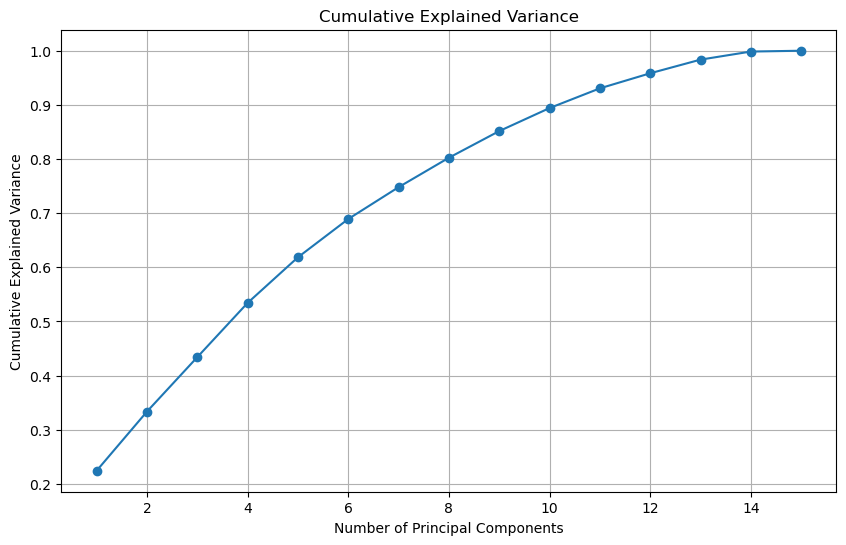

In [39]:
all_columns = X2.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X2[all_columns])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i + 1}' for i in range(len(pca.components_))], index=all_columns)

# Print the loadings for each principal component
for i in range(len(loadings_df.columns)):
    pc_num = loadings_df.columns[i]
    print(f'\nLoadings for {pc_num}:')
    print(loadings_df[pc_num].sort_values(ascending=False))

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance:")
print(cumulative_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



Loadings for PC1:
area               0.465027
bathrooms          0.346151
areaperbedroom     0.324123
parking            0.303630
airconditioning    0.282841
mainroad           0.274094
bbratio            0.244912
prefarea           0.239052
guestroom          0.222137
stories            0.193287
bedrooms           0.160430
basement           0.146780
semi_furnished     0.084079
hotwaterheating   -0.000105
unfurnished       -0.231022
Name: PC1, dtype: float64

Loadings for PC2:
areaperbedroom     0.537063
area               0.235356
unfurnished        0.167780
mainroad           0.134086
bbratio            0.091010
prefarea           0.045034
parking            0.041536
basement          -0.026543
guestroom         -0.030852
hotwaterheating   -0.077264
airconditioning   -0.126075
semi_furnished    -0.156055
bathrooms         -0.290152
stories           -0.415874
bedrooms          -0.541287
Name: PC2, dtype: float64

Loadings for PC3:
bbratio            0.516807
bathrooms          0.41

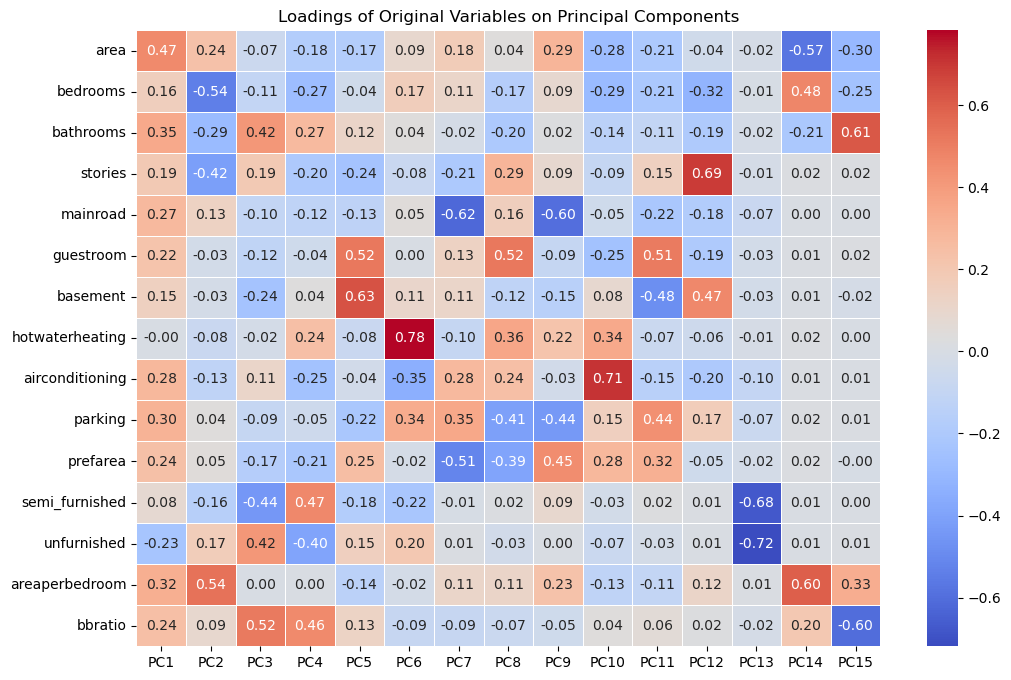

In [40]:
all_columns = X.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X[all_columns])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame to store loadings
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i + 1}' for i in range(len(pca.components_))], index=all_columns)

# Print the loadings for each principal component
for i in range(len(loadings_df.columns)):
    pc_num = loadings_df.columns[i]
    print(f'\nLoadings for {pc_num}:')
    print(loadings_df[pc_num].sort_values(ascending=False))

# You can also visualize the loadings using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Loadings of Original Variables on Principal Components')
plt.show()

Principal Component 1: 0.1847 of the total variance
Principal Component 2: 0.1343 of the total variance
Principal Component 3: 0.1092 of the total variance
Principal Component 4: 0.0999 of the total variance
Principal Component 5: 0.0927 of the total variance
Principal Component 6: 0.0706 of the total variance
Principal Component 7: 0.0596 of the total variance
Principal Component 8: 0.0548 of the total variance
Principal Component 9: 0.0512 of the total variance
Principal Component 10: 0.0473 of the total variance
Principal Component 11: 0.0384 of the total variance
Principal Component 12: 0.0288 of the total variance
Principal Component 13: 0.0252 of the total variance
Principal Component 14: 0.0020 of the total variance
Principal Component 15: 0.0014 of the total variance


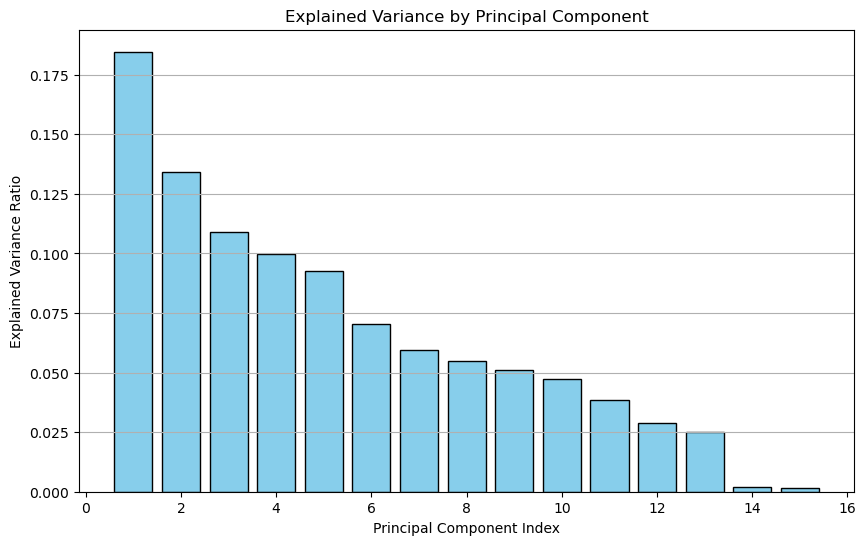

In [41]:
# Get the explained variance ratio for each principal component
variance_explained = pca.explained_variance_ratio_

# Print the results
for i, explained_var in enumerate(variance_explained):
    print(f"Principal Component {i + 1}: {explained_var:.4f} of the total variance")
    
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, len(variance_explained) + 1), variance_explained, color='skyblue', edgecolor='black')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(axis='y')
plt.show()

           Variable         VIF
0             price   30.319109
1              area  123.684364
2          bedrooms   26.285816
3         bathrooms  102.734664
4           stories    9.114826
5          mainroad    8.381835
6         guestroom    1.521894
7          basement    2.080692
8   hotwaterheating    1.135955
9   airconditioning    2.015081
10          parking    2.099471
11         prefarea    1.594901
12   semi_furnished    2.663179
13      unfurnished    2.484371
14   areaperbedroom  113.497405
15          bbratio  113.651086


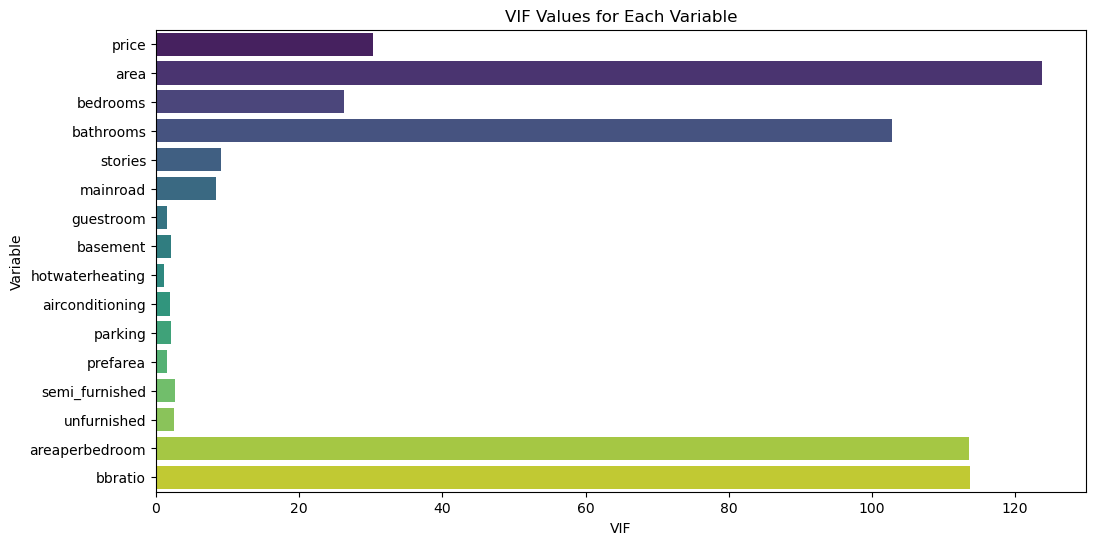

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your data is stored in a DataFrame called 'df'
# Selecting only numeric columns for simplicity
numeric_columns = raw_df.select_dtypes(include=['float64', 'int64']).columns
data_numeric = raw_df[numeric_columns]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(data_numeric.values, i) for i in range(data_numeric.shape[1])]

# Display the VIF data
print(vif_data)

plt.figure(figsize=(12, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='viridis', orient='h')
plt.title('VIF Values for Each Variable')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.show()

Medium    279
High      195
Low        71
Name: price_categories, dtype: int64


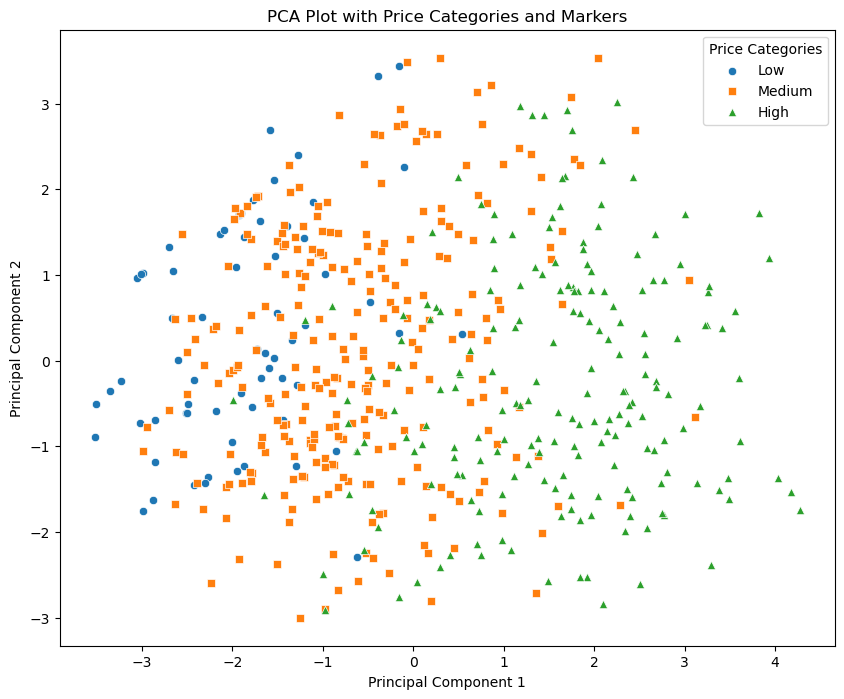

In [43]:
raw_df['price_categories'] = pd.cut(raw_df['price'], bins=[0, 3000000, 5000000, 10000000], labels=['Low', 'Medium', 'High'])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_standardized)
color_dict = {'Low': 'green', 'Medium': 'blue', 'High': 'purple'}
markers = {'Low': 'o', 'Medium': 's', 'High': '^'}

# Create a DataFrame with PCA results and price categories
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['price_categories'] = raw_df['price_categories']
print(pca_df['price_categories'].value_counts())

# Plot the PCA results with price categories and markers
plt.figure(figsize=(10, 8))
for category, marker in markers.items():
    category_data = pca_df[pca_df['price_categories'] == category]
    sns.scatterplot(x='PC1', y='PC2', data=category_data, marker=marker, label=category)

plt.title('PCA Plot with Price Categories and Markers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Price Categories')
plt.show()

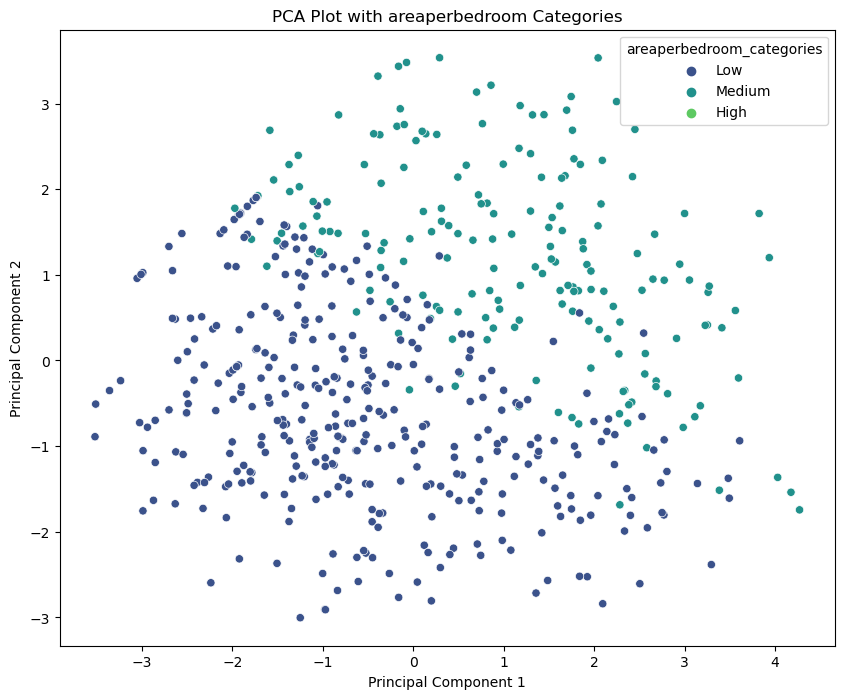

In [44]:
raw_df['areaperbedroom_categories'] = pd.cut(raw_df['areaperbedroom'], bins=[0, 2000, 4000, 6000], labels=['Low', 'Medium', 'High'])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_standardized)
color_dict = {'Low': 'green', 'Medium': 'blue', 'High': 'purple'}

# Create a DataFrame with PCA results and price categories
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['areaperbedroom_categories'] = raw_df['areaperbedroom_categories']

# Plot the PCA results with price categories
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='areaperbedroom_categories', data=pca_df, palette='viridis', legend='full')
plt.title('PCA Plot with areaperbedroom Categories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

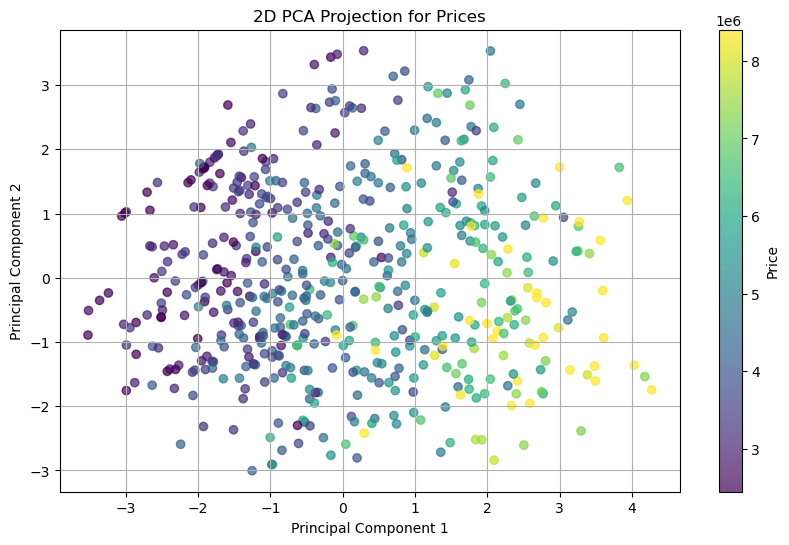

In [23]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)

# Create a DataFrame with the principal components and 'Category'
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Price'] = raw_df['price']

# Plot the 2D PCA projection for 'Price'
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Price'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Price')
plt.title('2D PCA Projection for Prices')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

C:\Users\gokul\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\gokul\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\gokul\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


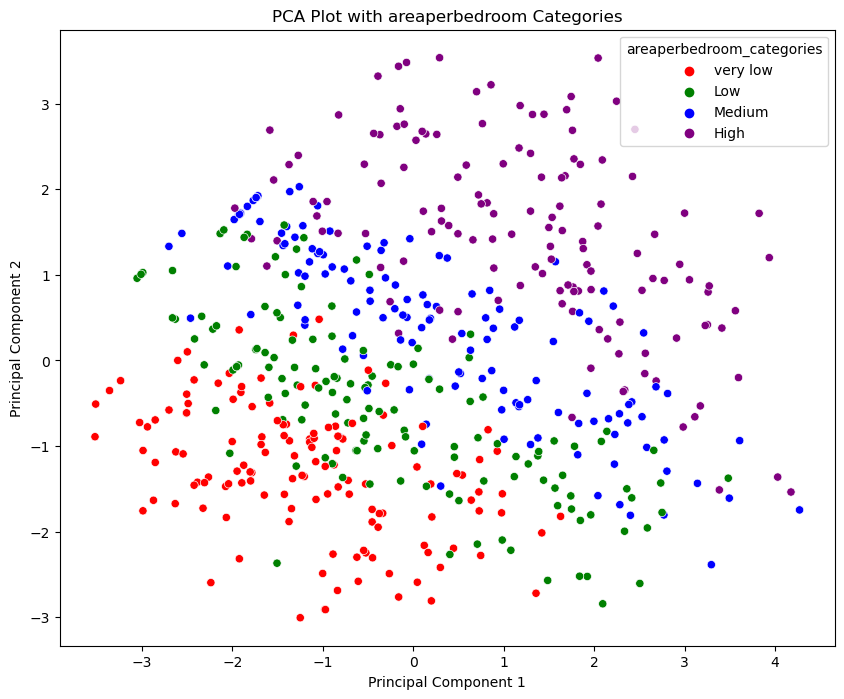

In [24]:
# Calculate quartiles for the 'price' column
q1 = raw_df['areaperbedroom'].quantile(0.25)
q2 = raw_df['areaperbedroom'].quantile(0.5)
q3 = raw_df['areaperbedroom'].quantile(0.75)

# Create a new categorical column based on quartiles
raw_df['areaperbedroom_categories'] = pd.cut(
    raw_df['areaperbedroom'],
    bins=[-np.inf, q1, q2, q3, np.inf],
    labels=['very low','Low', 'Medium', 'High']
)
color_dict = {'very low': 'red', 'Low': 'green', 'Medium': 'blue', 'High': 'purple'}

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_standardized)


pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['areaperbedroom_categories'] = raw_df['areaperbedroom_categories']

# Plot the PCA results with price categories
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='areaperbedroom_categories', data=pca_df, palette=color_dict, legend='full')
plt.title('PCA Plot with areaperbedroom Categories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()